In [1]:
import Feedback_Time_Model as fm
import SIRD_Model

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

[0.1545994517468759, 0.019560389185519778, 0.016612305228606985]
[0.14551798 0.01910631 0.01615823]
to infect: 2376.798686861832
to recov:  1954.4106791952693
to infect: 2388.8977162047745
to recov:  1969.6895915202915
to infect: 2400.74264297809
to recov:  1984.85347891024
to infect: 2412.3324154882553
to recov:  1999.8973105521454
to infect: 2423.666351052792
to recov:  2014.8161995686326
to infect: 2434.7441296643233
to recov:  2029.6054111594292
to infect: 2445.5657863636015
to recov:  2044.2603702192343
to infect: 2456.131702399333
to recov:  2058.776668404157
to infect: 2466.442595259789
to recov:  2073.150070622779
to infect: 2476.4995076672453
to recov:  2087.3765209318335
to infect: 2486.3037956312037
to recov:  2101.452147820526
to infect: 2495.857115660086
to recov:  2115.373268871555
to infect: 2505.1614112337097
to recov:  2129.136394790948
to infect: 2514.21889864034
to recov:  2142.738232802799
to infect: 2523.032052282432
to recov:  2156.1756894088967
to infect: 2531.60

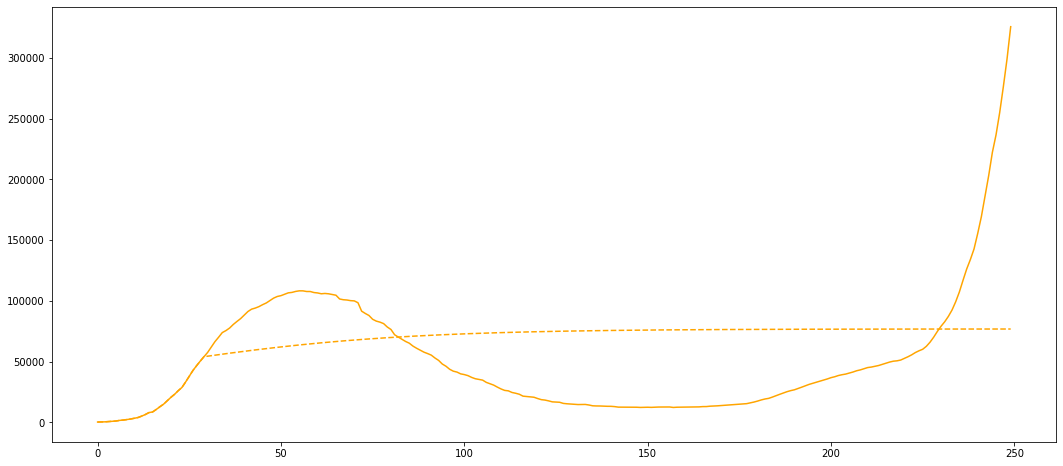

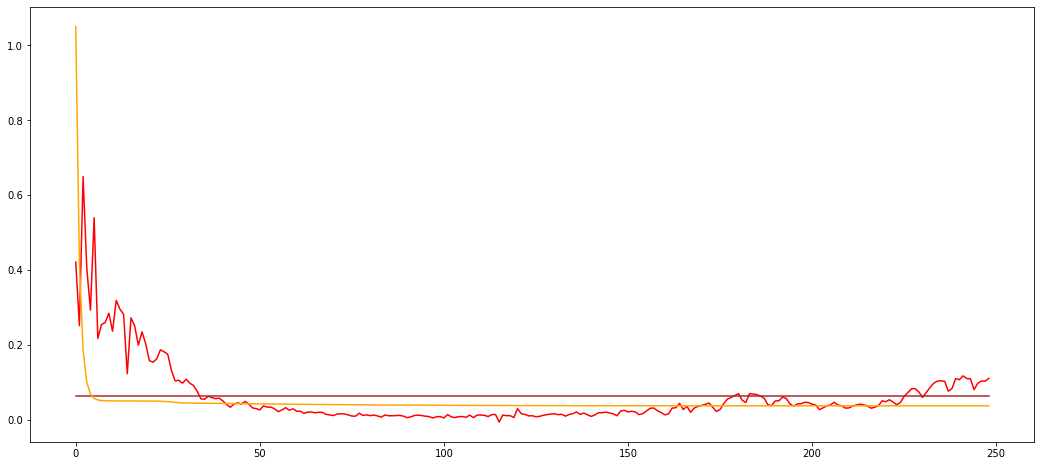

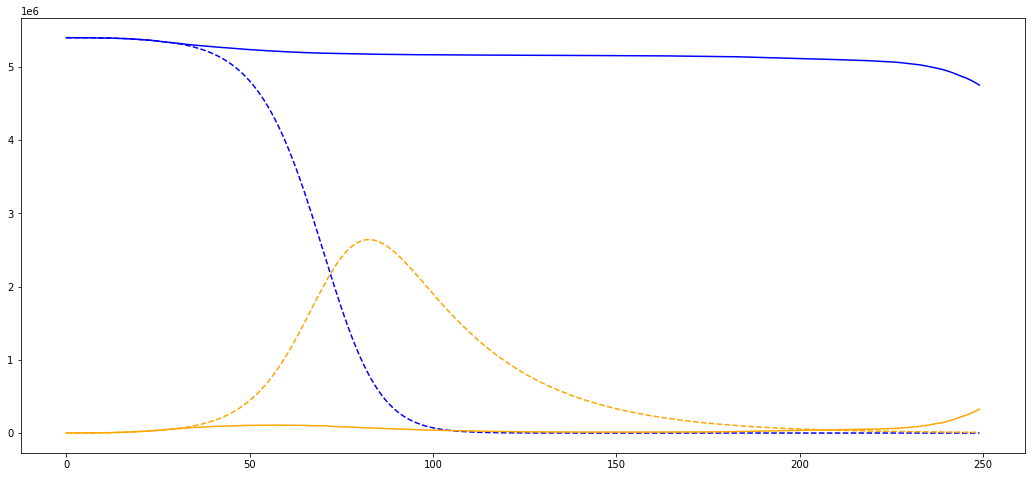

In [8]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = 250 #150 #just to get initial beginning data
daysToPredict = 220
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

lamda = 10 #regularization weight
w = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

q = .09
alpha = 1
C = 0
b1 = 50
b2 = 3

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], lamda, w)
print(linVars)
linVars[0]=.05

#predict future time
constParams = SIRD_Model.calculateConstantParams(infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], pop, q)
print(constParams)
fm.predictFeedMatch(nonLinVars, linVars, infect, recov, dead, pop, daysToPredict, graphVals=[0,1,0,0])
SIRD_Model.predictConstMatch(infect, recov, dead, pop, daysToPredict, constParams, q, graphVals=[1,1,0,0])

[0.057646362555374586, 0.031968153652521876, 0.000983367504777999]


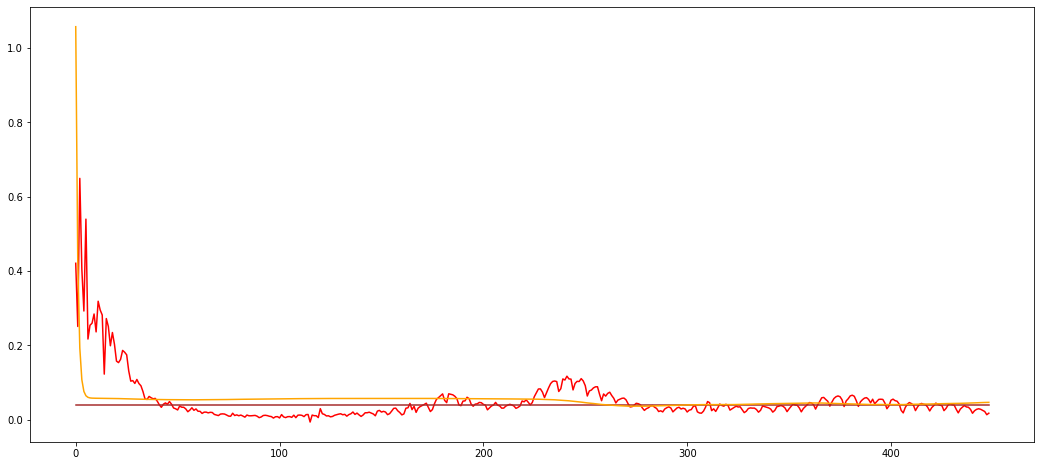

In [3]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = len(infectRaw) #max days
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

#set up constraints
#boundQ =     (.09,  .09) #q should be between 0 and 1
#boundAlpha = (0,   1.00)
#boundC =     (0,      0)
#boundB1 =    (0,     10)
#boundB2 =    (1,      4)

lamda = 10 #regularization weight
wVal = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

#q = .09
#alpha = .1
#C = 0
#b1 = 10
#b2 = 2

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect, recov, dead, lamda, w)

print(linVars)


betaConst = SIRD_Model.calculateConstantParams(infect, recov, dead, pop, q)[0]
betaConstGraph = np.ones((len(infect)-1))*betaConst #fill array with const value

fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.plot(SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q, graph=False)[:,0], color="red") #time varying beta
ax2.plot(betaConstGraph, color="brown") #constant beta
ax2.plot(fm.calculateBeta(nonLinVars, linVars, pop, infect), color="orange") #feedback beta

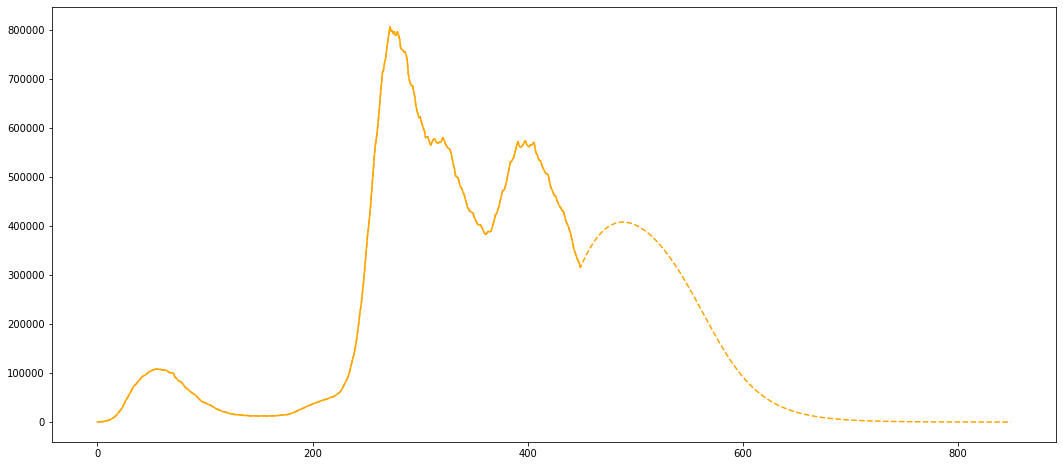

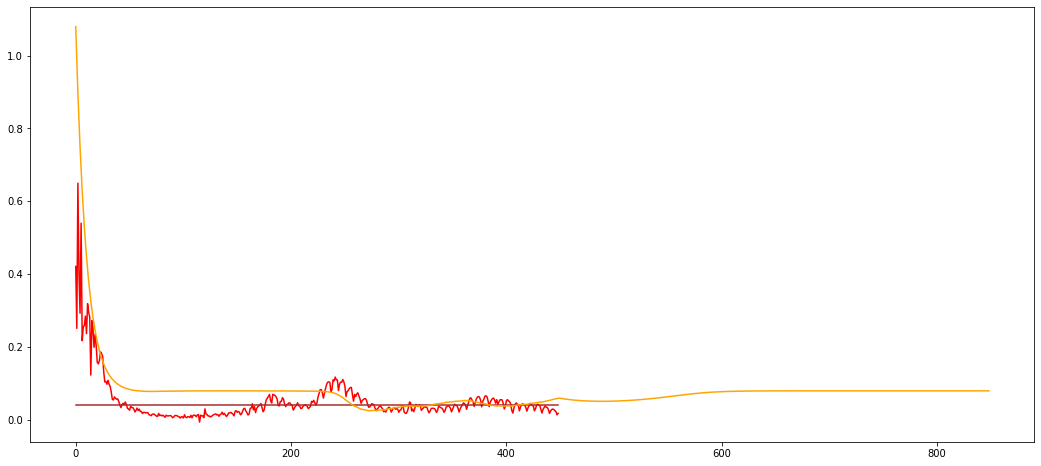

In [32]:
#predict future time

daysToPredict = 400

fm.predictFeedFuture(nonLinVars, linVars, infect, recov, dead, pop, daysToPredict, graphVals=[0,1,0,0])

(0.0, 1000.0)

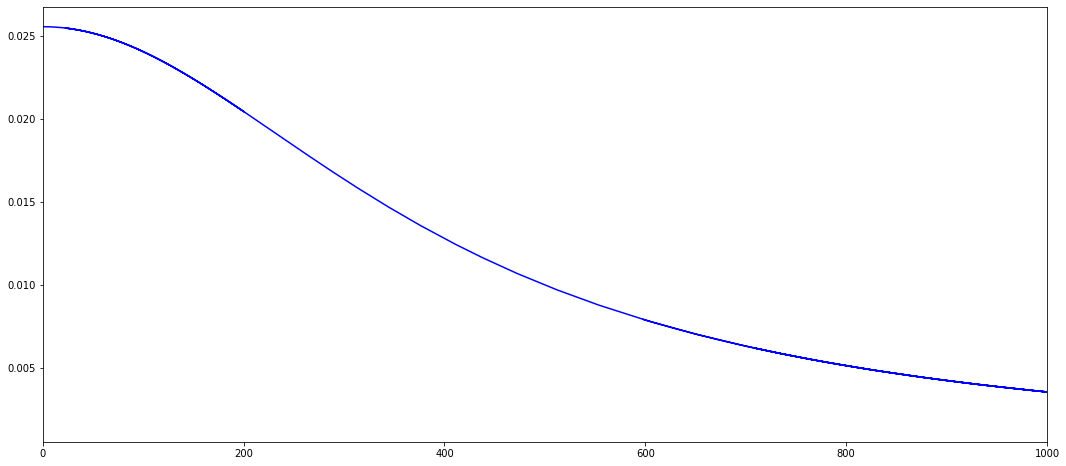

In [70]:
#graph feedback clope
infectScaled = 10000*(infect[:-1]/(q*pop)) #x axis, infections per 10000
betaY = linVars[1] / (1 + (nonLinVars[-2]*(infect[:-1]/(q*pop)))**nonLinVars[-1])

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectScaled, betaY, color='blue', label='beta by infections') #per 10,000
ax.set_xlim([0,1000])